<a href="https://colab.research.google.com/github/FahimS45/Python_mini_projects/blob/master/Statistical_Exploration_of_Quality_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Statistical project regarding the analysis of Wine Quality**

In [29]:
# Importing all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [30]:
# Downloading the "Wine Quality" dataset from UC Irvine Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Inspection
data = pd.read_csv(url, sep=';')

# print(data)

# **Descriptive Statistics**

In [31]:
# Describing the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [32]:
# List number of unique values per column
for i in data.keys():
  print(f"{i} has {len(np.unique(data[i]))} unique values")

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


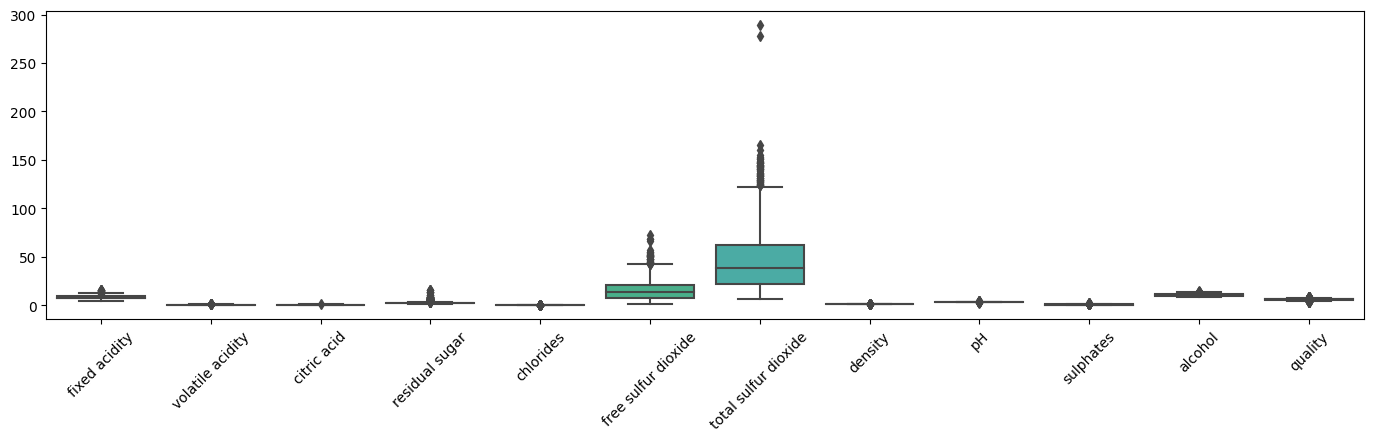

In [33]:
# Ploting some data using matplotlib and seaborn
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

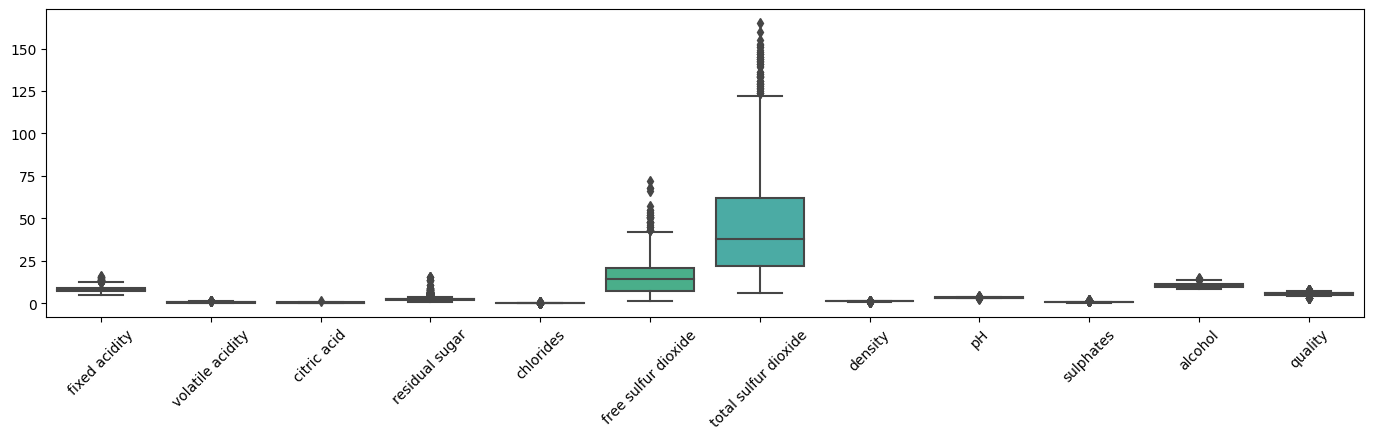

In [34]:
# Removing rows with outliers
data = data[data['total sulfur dioxide']<200]

fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

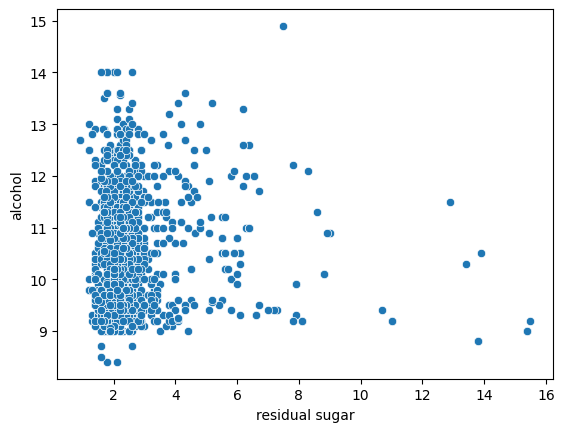

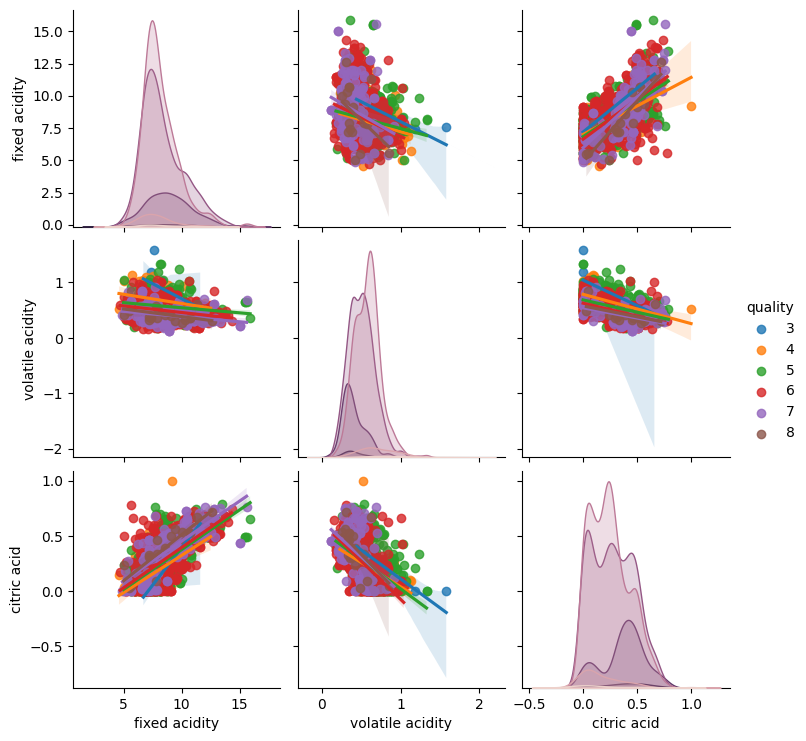

In [35]:
# Some exploration
sns.scatterplot(x=data['residual sugar'],y=data['alcohol'])
plt.show()

# Pairwise plots
cols2plot = ['fixed acidity','volatile acidity','citric acid','quality']
sns.pairplot(data[cols2plot],kind='reg',hue='quality')
plt.show()

# **Conducting T-test**

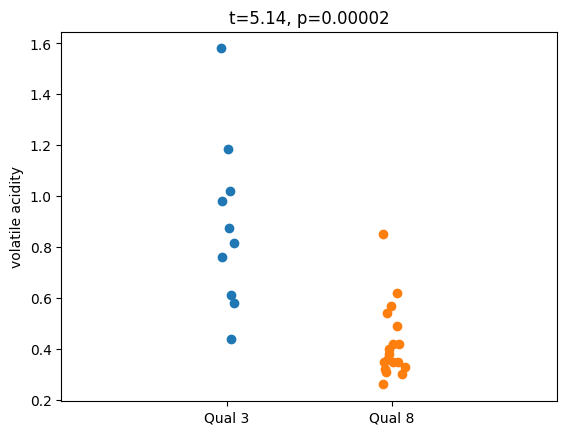

In [36]:
# T-test of volatile acidity on quality=3 vs. 8

x = data['volatile acidity'][data['quality']==3]
y = data['volatile acidity'][data['quality']==8]
ttest = stats.ttest_ind(x,y)

# Showing the data in a plot
plt.plot(np.random.randn(len(x))/30,x,'o', 1+np.random.randn(len(y))/30,y, 'o')
# Some random number is generated to add small amount of random noise
# The purpose of adding random numbers is to prevent overlapping of data points with identical or very close values.

plt.xlim([-1,2])
plt.xticks([0,1],labels=['Qual 3','Qual 8'])
plt.title(f't={ttest[0]:.2f}, p={ttest[1]:.5f}')
# t = t-value; p = p-value(probability)
plt.ylabel('volatile acidity')
plt.show()

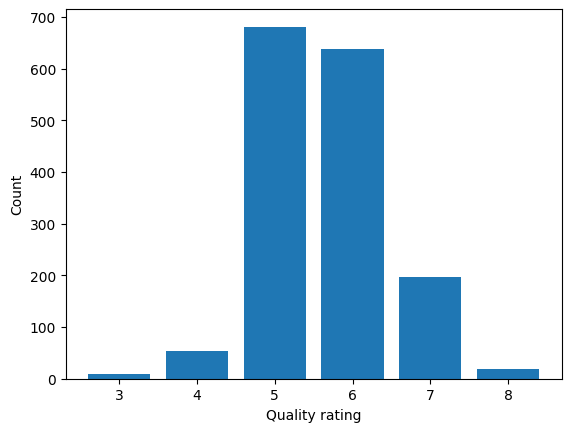

In [37]:
qualcounts = np.zeros(6)

# Gathering counts
n = 0
for i in range(3,9):
  qualcounts[n] = len( data[data['quality']==i] )
  n += 1

# Showing in a bar plot
plt.bar(range(3,9), qualcounts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

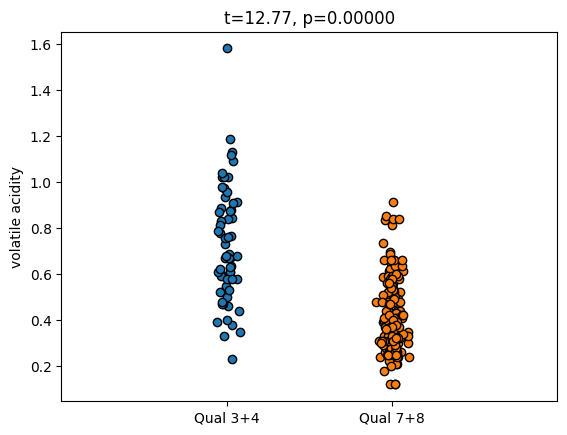

In [38]:
# T-test of volatile acidity on quality=3/4 vs. 7/8

x = data['volatile acidity'][(data['quality']==3) | (data['quality']==4)]
y = data['volatile acidity'][(data['quality']==7) | (data['quality']==8)]
ttest = stats.ttest_ind(x,y )

plt.plot(np.random.randn(len(x))/30,x,'o',
         1+np.random.randn(len(y))/30,y, 'o',markeredgecolor='k')
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Qual 3+4','Qual 7+8'])
plt.title(f't={ttest[0]:.2f}, p={ttest[1]:.5f}')
plt.ylabel('volatile acidity')
plt.show()


# **Regression Analysis**

***Multiple regression***

In [39]:
import statsmodels.api as sm

In [40]:
# Predicting quality from all other columns
dep_var  = data['quality']
ind_vars = data.drop(labels='quality',axis=1)

# Setting up model
ind_vars = sm.add_constant(ind_vars) # Adding an intercept term
model = sm.OLS(dep_var,ind_vars).fit() # Applying Ordinary Least Squares (OLS) method

# Showing the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          1.30e-145
Time:                        07:38:22   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

volatile acidity
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol


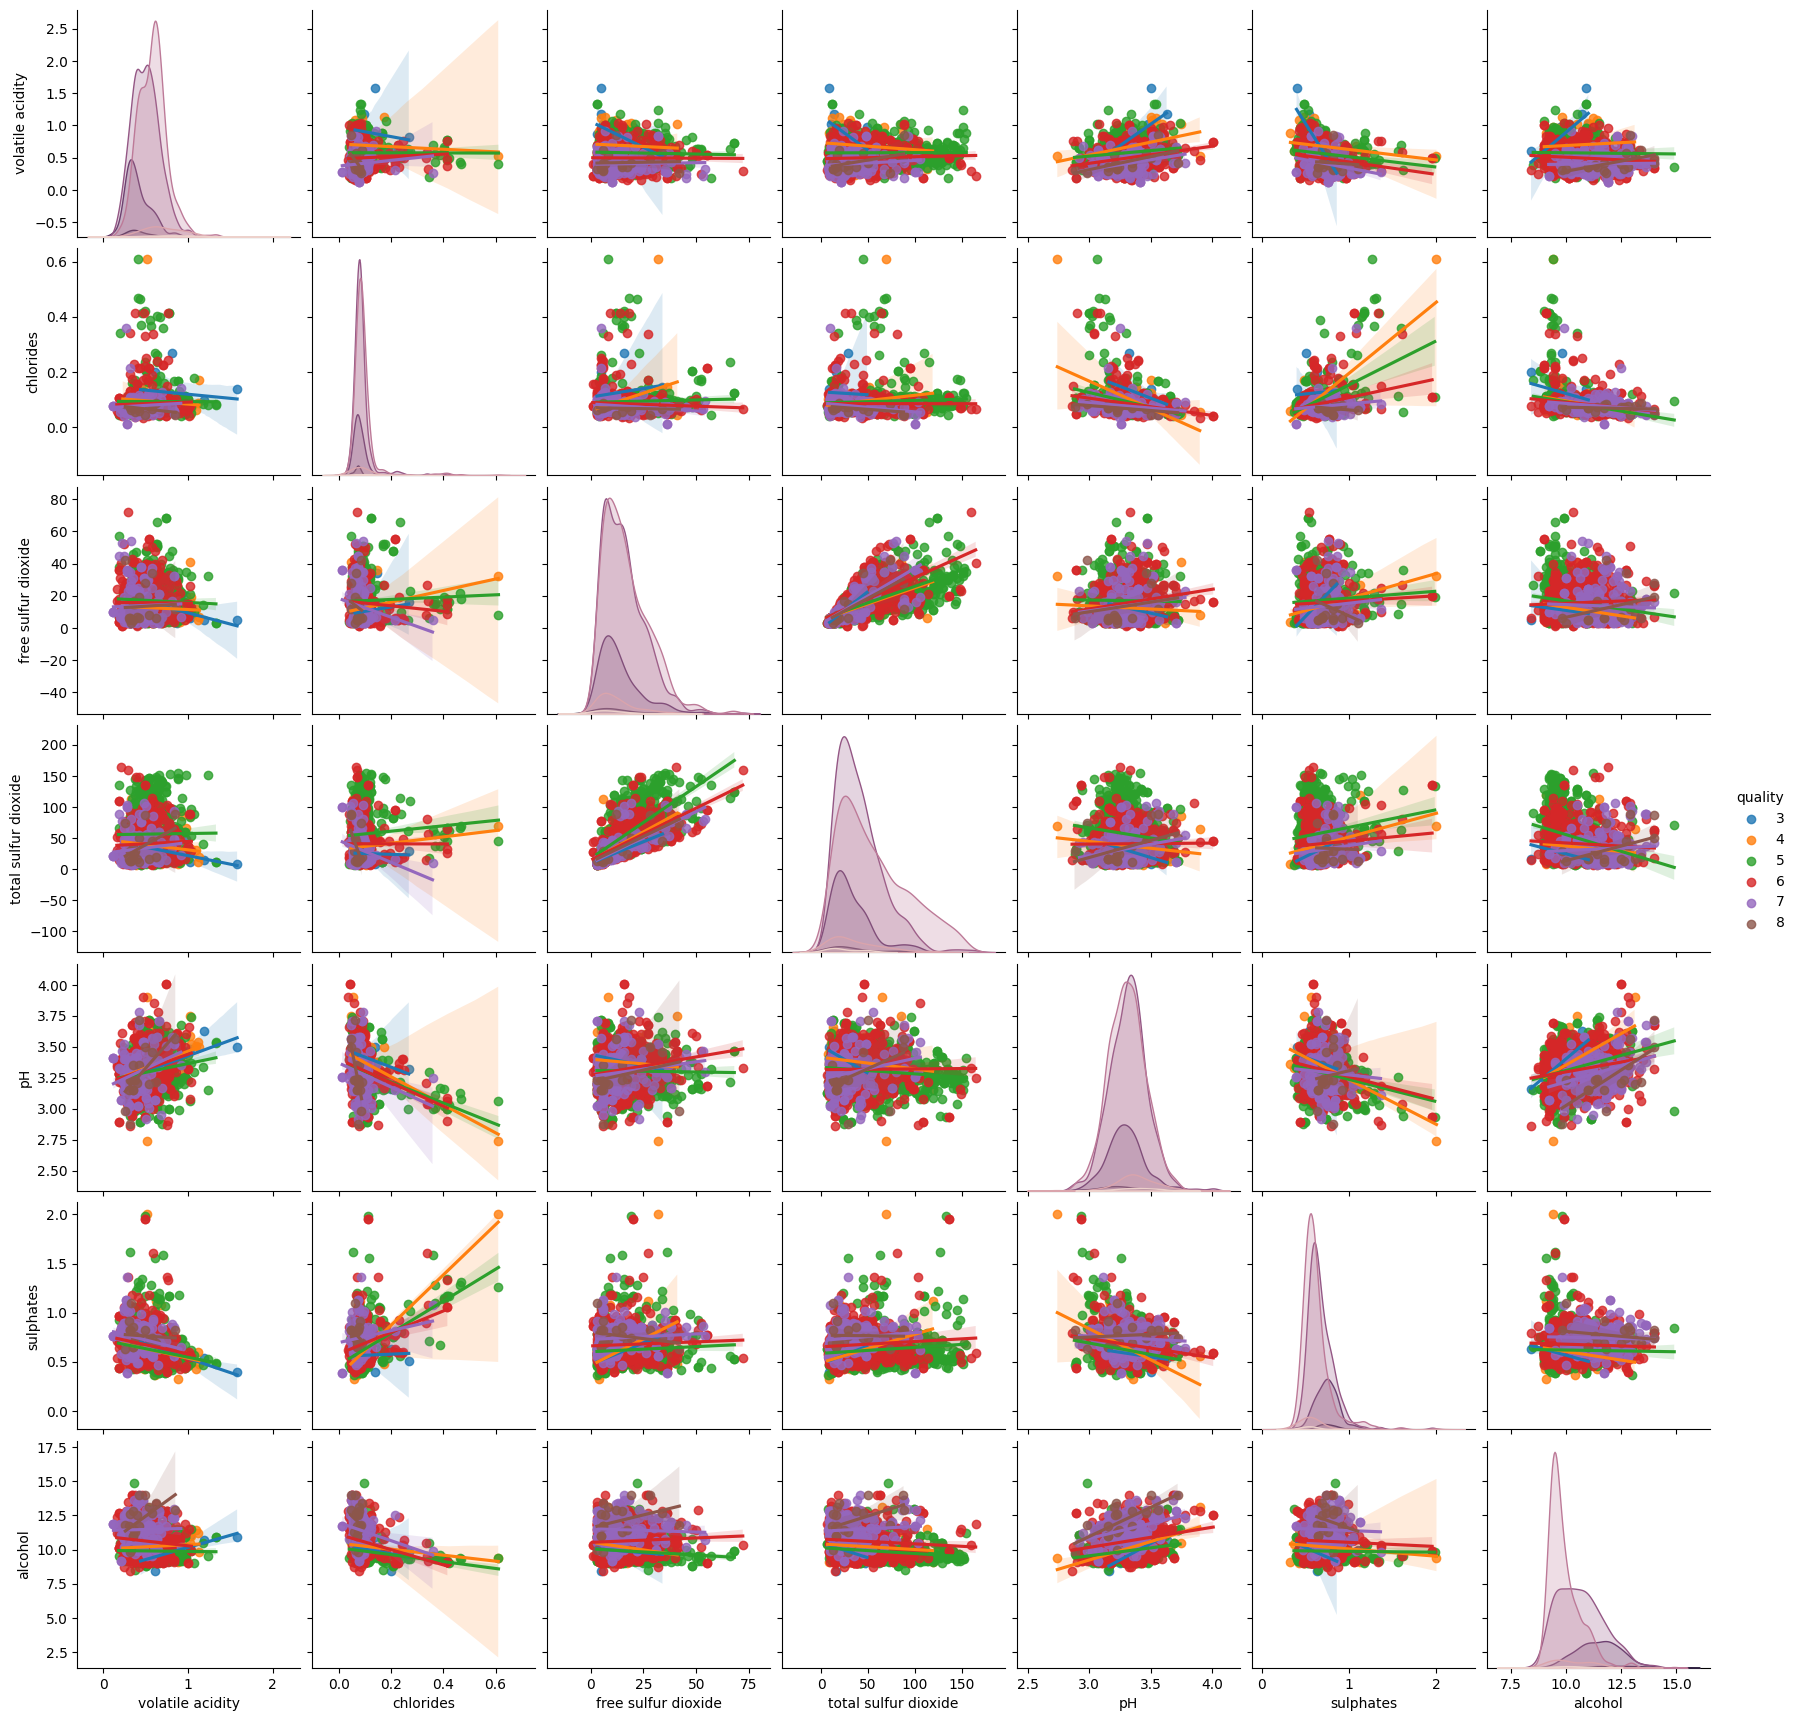

In [41]:
# Finding the Significant Column
significant_columns = list(model.pvalues[model.pvalues<.05].keys())
[print(i) for i in significant_columns]
significant_columns.append('quality')

# Pairwise plots just for significant effects
sns.pairplot(data[significant_columns],kind='reg',hue='quality')
plt.show()

***Logistic regression***

In [42]:
# Establishing a thresh point
binthresh = np.mean(data['quality'])
print(binthresh)

# Binarizing wine quality
data['binquality'] = data['quality']>binthresh
# print(data)

5.634314339386349


In [43]:
# List of all relevant columns to be used in regression
Xcols = []
for key in data.keys():
  if key not in ['quality','binquality']:
    Xcols.append(key)
print(Xcols)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [44]:
# Conducting the regression
model = sm.Logit(data['binquality'],data[Xcols])
results = model.fit(method='newton') # Applying Newton-Raphson iterative algorithm

# Summarizing the output
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             binquality   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           10
Date:                Mon, 17 Jul 2023   Pseudo R-squ.:                  0.2525
Time:                        07:39:17   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                2.601e-113
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1020      0.063      1.609      0.108      -0.022       0.226

In [45]:
# Finding the Significant Column
significant_columnsL = list(results.pvalues[results.pvalues<.05].keys())
[print(i) for i in significant_columnsL]

volatile acidity
citric acid
chlorides
free sulfur dioxide
total sulfur dioxide
density
sulphates
alcohol


[None, None, None, None, None, None, None, None]

In [46]:
# Printing significant predictors from both regression
print("Significant predictors from standard regression:")
[print("  "+i) for i in significant_columns]

print(' ')
print("Significant predictors from logistic regression:")
[print("  "+i) for i in significant_columnsL[:-1]];

Significant predictors from standard regression:
  volatile acidity
  chlorides
  free sulfur dioxide
  total sulfur dioxide
  pH
  sulphates
  alcohol
  quality
 
Significant predictors from logistic regression:
  volatile acidity
  citric acid
  chlorides
  free sulfur dioxide
  total sulfur dioxide
  density
  sulphates


# **Transforming to Gaussian**

In [47]:
n = 500

x = np.cumsum(np.random.randn(n))

y = (stats.rankdata(x)/(n+1) - .5 )*2
y = np.arctanh(y)
print(np.min(y),np.max(y))

-3.1073040492110966 3.107304049211083


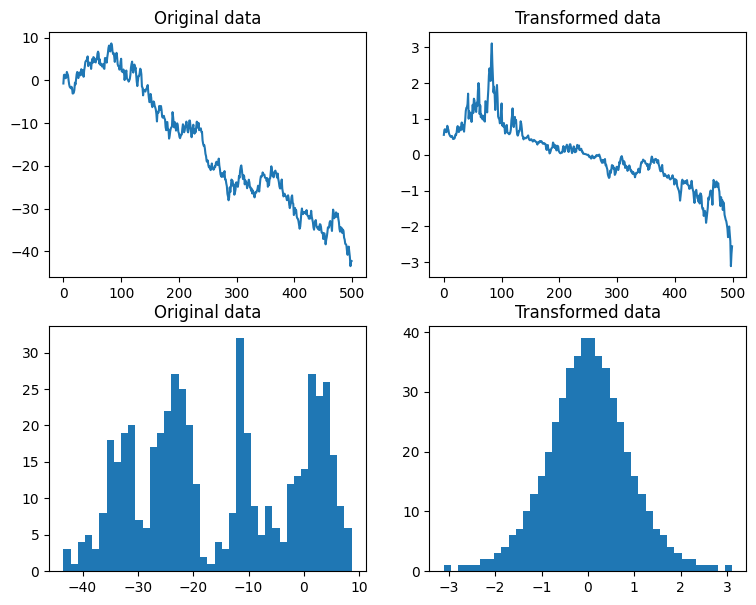

In [48]:
fig,ax = plt.subplots(2,2,figsize=(9,7))

ax[0,0].plot(x)
ax[0,0].set_title('Original data')
ax[0,1].plot(y)
ax[0,1].set_title('Transformed data')

ax[1,0].hist(x,bins=40)
ax[1,0].set_title('Original data')
ax[1,1].hist(y,bins=40)
ax[1,1].set_title('Transformed data')

plt.show()

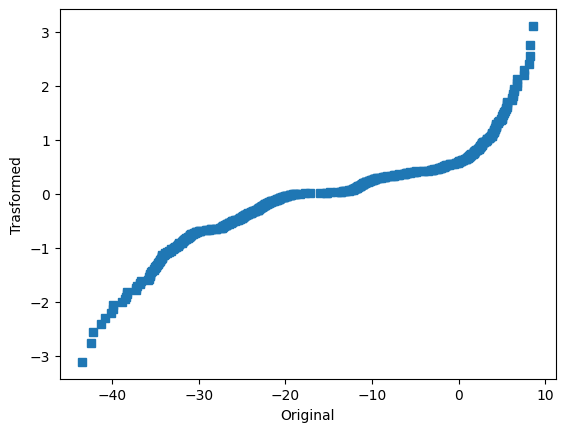

In [49]:
plt.plot(x,y,'s')
plt.xlabel('Original')
plt.ylabel('Trasformed')
plt.show()